### Tidally induced bar


Notebook para análise de uma galáxia da IllustrisTNG-50 que tem barra induzida por interação com outra galáxia.

In [26]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
from scipy import stats
from scipy.signal import savgol_filter
from astropy.cosmology import FlatLambdaCDM
from functions import *

In [27]:
plt.rc('text', usetex=True)
plt.rcParams['font.size'] = 20

In [28]:
path = 'snapshots_novos/'

In [29]:
n_snapshots = 100

In [30]:
time = np.empty(n_snapshots)
A2 = np.empty(n_snapshots)
n = np.empty(n_snapshots)

In [31]:
for j in range (2, n_snapshots):
    index = str(j).zfill(3)
    snapshot = path + f'snapshot{index}.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #tempo
    time[j] = f['Header'].attrs['Time']
            
    #ler info estrelas e corrigir posição
    f_star = f['PartType4']

    #quantidade de partículas
    n[j] = len(np.array(f_star['Masses']))

print(n)

[4.12536425e-316 0.00000000e+000 2.00000000e+000 7.00000000e+000
 1.00000000e+001 9.00000000e+000 1.05000000e+002 2.97000000e+002
 8.90000000e+001 6.09000000e+002 8.36000000e+002 1.05800000e+003
 1.98700000e+003 2.80500000e+003 3.11700000e+003 5.25600000e+003
 6.25500000e+003 8.58600000e+003 1.19930000e+004 1.94900000e+004
 2.46850000e+004 3.00100000e+004 4.56360000e+004 5.35540000e+004
 6.77950000e+004 1.01718000e+005 1.23595000e+005 1.95007000e+005
 2.72473000e+005 4.43746000e+005 5.06782000e+005 5.57378000e+005
 6.22131000e+005 6.94882000e+005 7.64965000e+005 8.18501000e+005
 8.84408000e+005 9.14249000e+005 9.45124000e+005 1.00313800e+006
 1.08893700e+006 1.12487900e+006 1.18855300e+006 1.25675200e+006
 1.30677900e+006 1.33847800e+006 1.36924800e+006 1.40158200e+006
 1.44656900e+006 1.48575100e+006 1.52670700e+006 1.58669700e+006
 1.60286700e+006 1.61371800e+006 1.63168600e+006 1.65589900e+006
 1.68383700e+006 1.72651200e+006 1.76313600e+006 1.80728400e+006
 1.84118200e+006 1.891344

In [34]:
#força da barra
for j in range (21, n_snapshots):
    index = str(j).zfill(3)
    snapshot = path + f'snapshot{index}.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #tempo
    time[j] = f['Header'].attrs['Time']
            
    #ler info estrelas e corrigir posição
    f_star = f['PartType4']

    x_star = np.array(f_star['Coordinates'][:,0])
    y_star = np.array(f_star['Coordinates'][:,1])
    z_star = np.array(f_star['Coordinates'][:,2])
    m_star = np.array(f_star['Masses'])

    #excluindo wind particles
    cond = np.argwhere(np.array(f_star['GFM_StellarFormationTime']) >= 0)
    x_star2 = x_star[cond]
    y_star2 = y_star[cond]
    z_star2 = z_star[cond]
    m_star2 = m_star[cond]
    
    #calcular força da barra         
    A2[j] = bar_strength(m=m_star, x=x_star, y=y_star, Rmax=6.0, Nbins=30, n_snapshots=n_snapshots)

    #A2[j] = bar_strength(m=m_star2, x=x_star2, y=y_star2, Rmax=6.0, Nbins=30, n_snapshots=n_snapshots)

In [8]:
print(A2)

[4.14752033e-316 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 6.94796772e-310 6.94796772e-310 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 2.89381745e-001 2.14384444e-001 1.55064118e-001
 1.66898692e-001 1.30219645e-001 2.58014856e-001 2.65994898e-001
 3.19618851e-001 3.17494019e-001 1.76799207e-001 8.09686301e-002
 1.14338269e-001 9.53334425e-002 1.12955764e-001 1.28619624e-001
 3.12977323e-001 2.24702739e-001 1.30017464e-001 1.00154334e-001
 1.12739059e-001 1.33524949e-001 8.38814116e-002 9.46920235e-002
 1.88676592e-001 2.00668766e-001 2.40368752e-001 2.75874815e-001
 3.18030603e-001 3.61197991e-001 3.40039084e-001 3.43260480e-001
 3.49362590e-001 3.82279607e-001 3.48423354e-001 3.69593636e-001
 3.59908939e-001 3.83449182e-001 3.86027174e-001 3.71986425e-001
 3.64091236e-001 3.688360

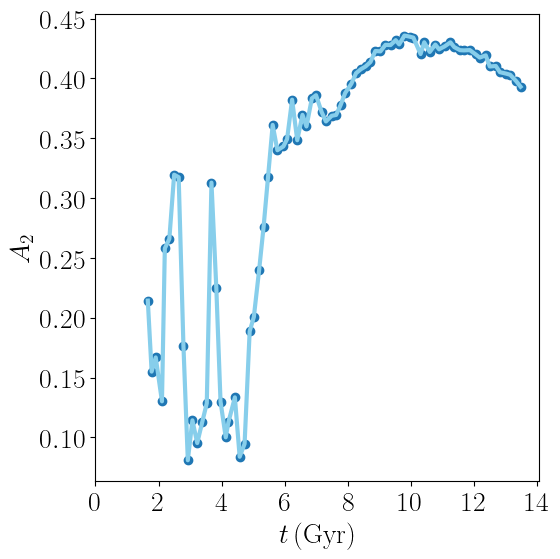

In [35]:
plt.figure(figsize=[6,6])
plt.plot(time[22:], A2[22:], color='skyblue', lw=3, label='')#, $20\%$ bulge')
plt.scatter(time[22:], A2[22:])
plt.xlabel('$t \, \mathrm{(Gyr)}$')#, fontsize=15)
plt.ylabel('$A_2$')#, fontsize=15)
#plt.legend(loc='lower right', frameon=False, fontsize=14)
plt.xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0])
plt.tight_layout()
#plt.savefig('a2-semwind.png')

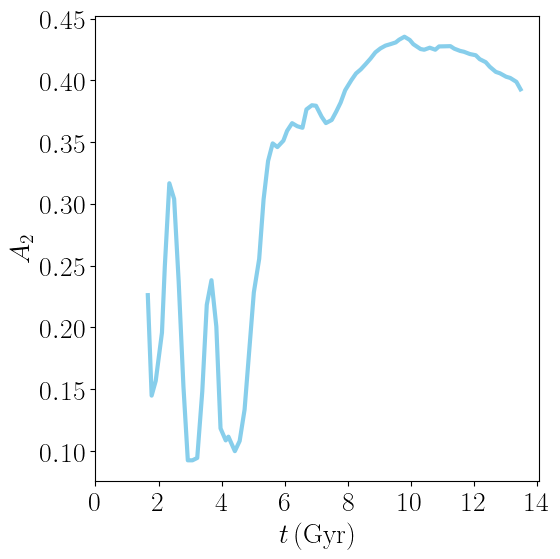

In [36]:
A2_smooth = savgol_filter(A2, window_length=6, polyorder=3)

plt.figure(figsize=[6,6])
plt.plot(time[22:], A2_smooth[22:], color='skyblue', lw=3, label='')#, $20\%$ bulge')
plt.xlabel('$t \, \mathrm{(Gyr)}$')#, fontsize=15)
plt.ylabel('$A_2$')#, fontsize=15)
#plt.legend(loc='lower right', frameon=False, fontsize=14)
plt.xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0])
plt.tight_layout()
plt.savefig('a2-suave.png')

To do:

- Limite mínimo de resolução: 40000 partículas?
- Excluir wind particles do cálculo: np.argwhere(GFM_StellarFormationTime >= 0).